# Import data


In [136]:
# Import data
from google.colab import drive
import pandas as pd
import numpy as np
import gc
import torch

# Import preprocessed data (set 1)
drive.mount('/content/drive', force_remount=True)
file_path_trd = '/content/drive/MyDrive/Classes/Intro ML/Project/Dataset/train_data_1.csv'
file_path_trl = '/content/drive/MyDrive/Classes/Intro ML/Project/Dataset/train_labels_1.csv'
file_path_ted = '/content/drive/MyDrive/Classes/Intro ML/Project/Dataset/test_data_1.csv'
file_path_tel = '/content/drive/MyDrive/Classes/Intro ML/Project/Dataset/test_labels_1.csv'

train_data_1 = pd.read_csv(file_path_trd).to_numpy()
train_labels_1 = pd.read_csv(file_path_trl).to_numpy()
test_data_1 = pd.read_csv(file_path_ted).to_numpy()
test_labels_1 = pd.read_csv(file_path_tel).to_numpy()

# Convert to pytorch tensors
train_data_1 = torch.tensor(train_data_1, dtype=torch.float32)
train_labels_1 = torch.tensor(train_labels_1, dtype=torch.long) # Use long for class indices
test_data_1 = torch.tensor(test_data_1, dtype=torch.float32)
test_labels_1 = torch.tensor(test_labels_1, dtype=torch.long) # Use long for class indices

# Import preprocessed data (set 2)
file_path_trd = '/content/drive/MyDrive/Classes/Intro ML/Project/Dataset/train_data_2.csv'
file_path_trl = '/content/drive/MyDrive/Classes/Intro ML/Project/Dataset/train_labels_2.csv'
file_path_ted = '/content/drive/MyDrive/Classes/Intro ML/Project/Dataset/test_data_2.csv'
file_path_tel = '/content/drive/MyDrive/Classes/Intro ML/Project/Dataset/test_labels_2.csv'

train_data_2 = pd.read_csv(file_path_trd).to_numpy()
train_labels_2 = pd.read_csv(file_path_trl).to_numpy()
test_data_2 = pd.read_csv(file_path_ted).to_numpy()
test_labels_2 = pd.read_csv(file_path_tel).to_numpy()

# Convert to pytorch tensors
train_data_2 = torch.tensor(train_data_2, dtype=torch.float32)
train_labels_2 = torch.tensor(train_labels_2, dtype=torch.long) # Use long for class indices
test_data_2 = torch.tensor(test_data_2, dtype=torch.float32)
test_labels_2 = torch.tensor(test_labels_2, dtype=torch.long) # Use long for class indices

Mounted at /content/drive


# Get Scikit-Learn models


In [137]:
# Logistic regression model 1
from sklearn.linear_model import LogisticRegression

# Ensure labels are 1D arrays for scikit-learn
train_labels_np = train_labels_1.cpu().numpy().ravel()
test_labels_np = test_labels_1.cpu().numpy().ravel()

# Initialize and train the Logistic Regression classifier
# 'multi_class' set to 'auto' for multi-class classification
log_reg_classifier_1 = LogisticRegression(random_state=42, solver='liblinear', multi_class='auto')
log_reg_classifier_1.fit(train_data_1.cpu().numpy(), train_labels_np)

/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


LogisticRegression(multi_class='auto', random_state=42, solver='liblinear')

In [138]:
# Logistic regression model 2
from sklearn.linear_model import LogisticRegression

# Ensure labels are 1D arrays for scikit-learn
train_labels_np = train_labels_2.cpu().numpy().ravel()
test_labels_np = test_labels_2.cpu().numpy().ravel()

# Initialize and train the Logistic Regression classifier
# Using 'liblinear' solver which is good for small datasets and L1/L2 regularization
# 'multi_class' set to 'auto' for multi-class classification
log_reg_classifier_2 = LogisticRegression(random_state=42, solver='liblinear', multi_class='auto')
log_reg_classifier_2.fit(train_data_2.cpu().numpy(), train_labels_np)

/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


LogisticRegression(multi_class='auto', random_state=42, solver='liblinear')

In [139]:
# SVC model 1

from sklearn.svm import SVC

# Convert PyTorch tensors to NumPy arrays for scikit-learn
train_data_np = train_data_1.cpu().numpy()
train_labels_np = train_labels_1.cpu().numpy().ravel() # Ensure labels are 1D arrays
test_data_np = test_data_1.cpu().numpy()
test_labels_np = test_labels_1.cpu().numpy().ravel()   # Ensure labels are 1D arrays

# Initialize and train the SVM classifier
svm_classifier_1 = SVC(random_state=42)
svm_classifier_1.fit(train_data_np, train_labels_np)

SVC(random_state=42)

In [140]:
# SVC model 2

from sklearn.svm import SVC

# Convert PyTorch tensors to NumPy arrays for scikit-learn
train_data_np = train_data_2.cpu().numpy()
train_labels_np = train_labels_2.cpu().numpy().ravel() # Ensure labels are 1D arrays
test_data_np = test_data_2.cpu().numpy()
test_labels_np = test_labels_2.cpu().numpy().ravel()   # Ensure labels are 1D arrays

# Initialize and train the SVM classifier
svm_classifier_2 = SVC(random_state=42)
svm_classifier_2.fit(train_data_np, train_labels_np)

SVC(random_state=42)

# Define FNN model classes

In [141]:
import torch.nn as nn

# FNN model with dropout and weight decay
input_features = 4   # Training features
output_features = 3                   # Number of actions
hidden_layers = [10, 20, 30, 20]
class FNN_D_WD(nn.Module):
    def __init__(self):
      super(FNN_D_WD, self).__init__()
      self.act = nn.ReLU()
      self.fc1 = nn.Linear(input_features, hidden_layers[0])
      self.fc2 = nn.Linear(hidden_layers[0], hidden_layers[1])
      self.fc3 = nn.Linear(hidden_layers[1], hidden_layers[2])
      self.fc4 = nn.Linear(hidden_layers[2], hidden_layers[3])
      self.fc5 = nn.Linear(hidden_layers[3], output_features)
      self.reg = nn.Dropout(p=0.5)
      self.out = nn.Softmax(dim=1)
    def forward(self, x):
      x = self.act(self.reg(self.fc1(x)))
      x = self.act(self.reg(self.fc2(x)))
      x = self.act(self.reg(self.fc3(x)))
      x = self.act(self.reg(self.fc4(x)))
      x = self.out(self.fc5(x))
      return x

In [142]:
# FNN with batch normalization
input_features = 4   # Training features
output_features = 3                   # Number of actions
hidden_layers = [10, 20, 30, 20]
class FNN_BN(nn.Module):
    def __init__(self):
      super(FNN_BN, self).__init__()
      self.act = nn.ReLU()
      self.fc1 = nn.Linear(input_features, hidden_layers[0])
      self.bn1 = nn.BatchNorm1d(hidden_layers[0])
      self.fc2 = nn.Linear(hidden_layers[0], hidden_layers[1])
      self.bn2 = nn.BatchNorm1d(hidden_layers[1])
      self.fc3 = nn.Linear(hidden_layers[1], hidden_layers[2])
      self.bn3 = nn.BatchNorm1d(hidden_layers[2])
      self.fc4 = nn.Linear(hidden_layers[2], hidden_layers[3])
      self.bn4 = nn.BatchNorm1d(hidden_layers[3])
      self.fc5 = nn.Linear(hidden_layers[3], output_features)
      self.out = nn.Softmax(dim=1)
    def forward(self, x):
      x = self.act(self.bn1(self.fc1(x)))
      x = self.act(self.bn2(self.fc2(x)))
      x = self.act(self.bn3(self.fc3(x)))
      x = self.act(self.bn4(self.fc4(x)))
      x = self.out(self.fc5(x))
      return x

In [143]:
# FNN with dropout
input_features = 4   # Training features
output_features = 3                   # Number of actions
hidden_layers = [10, 20, 30, 20]
class FNN_D(nn.Module):
    def __init__(self):
      super(FNN_D, self).__init__()
      self.act = nn.ReLU()
      self.fc1 = nn.Linear(input_features, hidden_layers[0])
      self.fc2 = nn.Linear(hidden_layers[0], hidden_layers[1])
      self.fc3 = nn.Linear(hidden_layers[1], hidden_layers[2])
      self.fc4 = nn.Linear(hidden_layers[2], hidden_layers[3])
      self.fc5 = nn.Linear(hidden_layers[3], output_features)
      self.reg = nn.Dropout(p=0.5)
      self.out = nn.Softmax(dim=1)
    def forward(self, x):
      x = self.act(self.reg(self.fc1(x)))
      x = self.act(self.reg(self.fc2(x)))
      x = self.act(self.reg(self.fc3(x)))
      x = self.act(self.reg(self.fc4(x)))
      x = self.out(self.fc5(x))
      return x

In [144]:
# FNN with weight decay
input_features = 4   # Training features
output_features = 3                   # Number of actions
hidden_layers = [10, 20, 30, 20]
class FNN_WD(nn.Module):
    def __init__(self):
      super(FNN_WD, self).__init__()
      self.act = nn.Tanh()
      self.fc1 = nn.Linear(input_features, hidden_layers[0])
      self.fc2 = nn.Linear(hidden_layers[0], hidden_layers[1])
      self.fc3 = nn.Linear(hidden_layers[1], hidden_layers[2])
      self.fc4 = nn.Linear(hidden_layers[2], hidden_layers[3])
      self.fc5 = nn.Linear(hidden_layers[3], output_features)
      self.out = nn.Softmax(dim=1)
    def forward(self, x):
      x = self.act(self.fc1(x))
      x = self.act(self.fc2(x))
      x = self.act(self.fc3(x))
      x = self.act(self.fc4(x))
      x = self.out(self.fc5(x))
      return x

# Import trained FNN model weights

In [145]:
from google.colab import drive
drive.mount("/content/drive")
import torch

# Label set 1
FNN_D_WD_1 = torch.load('/content/drive/MyDrive/Classes/Intro ML/Project/Models/FNN_D_WD_1.pth', weights_only=False)
FNN_D_1 = torch.load('/content/drive/MyDrive/Classes/Intro ML/Project/Models/FNN_D_1.pth', weights_only=False)
FNN_WD_1 = torch.load('/content/drive/MyDrive/Classes/Intro ML/Project/Models/FNN_WD_1.pth', weights_only=False)
FNN_BN_1 = torch.load('/content/drive/MyDrive/Classes/Intro ML/Project/Models/FNN_BN_1.pth', weights_only=False)

# Label set 2
FNN_D_WD_2 = torch.load('/content/drive/MyDrive/Classes/Intro ML/Project/Models/FNN_D_WD_2.pth', weights_only=False)
FNN_D_2 = torch.load('/content/drive/MyDrive/Classes/Intro ML/Project/Models/FNN_D_2.pth', weights_only=False)
FNN_WD_2 = torch.load('/content/drive/MyDrive/Classes/Intro ML/Project/Models/FNN_WD_2.pth', weights_only=False)
FNN_BN_2 = torch.load('/content/drive/MyDrive/Classes/Intro ML/Project/Models/FNN_BN_2.pth', weights_only=False)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [146]:
test = [6, 6, 0, 0]
test = torch.tensor(test, dtype=torch.float32).unsqueeze(0)

print("Label set 1")
print(log_reg_classifier_1.predict(test))
print(svm_classifier_1.predict(test))
print(FNN_D_WD_1(test))
print(FNN_D_1(test))
print(FNN_WD_1(test))
print(FNN_BN_1(test))

print("\nLabel set 2")
print(log_reg_classifier_2.predict(test))
print(svm_classifier_2.predict(test))
print(FNN_D_WD_2(test))
print(FNN_D_2(test))
print(FNN_WD_2(test))
print(FNN_BN_2(test))

Label set 1
[1]
[0]
tensor([[3.7016e-14, 1.0000e+00, 2.9922e-25]], grad_fn=<SoftmaxBackward0>)
tensor([[4.7687e-11, 1.0000e+00, 2.4329e-22]], grad_fn=<SoftmaxBackward0>)
tensor([[7.4658e-03, 9.9226e-01, 2.7480e-04]], grad_fn=<SoftmaxBackward0>)
tensor([[3.0339e-09, 1.0000e+00, 0.0000e+00]], grad_fn=<SoftmaxBackward0>)

Label set 2
[1]
[0]
tensor([[2.4021e-24, 1.0000e+00, 1.3293e-21]], grad_fn=<SoftmaxBackward0>)
tensor([[0., 1., 0.]], grad_fn=<SoftmaxBackward0>)
tensor([[8.9737e-08, 9.9991e-01, 8.8198e-05]], grad_fn=<SoftmaxBackward0>)
tensor([[3.2206e-02, 2.4719e-04, 9.6755e-01]], grad_fn=<SoftmaxBackward0>)


# Prepare Blackjack Simulation





In [147]:
import random

def create_deck():
    suits = ['Hearts', 'Diamonds', 'Clubs', 'Spades']
    ranks = ['2', '3', '4', '5', '6', '7', '8', '9', '10', 'J', 'Q', 'K', 'A']
    deck = []
    for suit in suits:
        for rank in ranks:
            value = 0
            if rank in ['J', 'Q', 'K']:
                value = 10
            elif rank == 'A':
                value = 11
            else:
                value = int(rank)
            deck.append({'rank': rank, 'suit': suit, 'value': value})
    return deck

def shuffle_deck(deck):
    random.shuffle(deck)
    return deck

def deal_card(deck):
    if not deck:
        print("Deck is empty, reshuffling a new deck.")
        deck = shuffle_deck(create_deck())
    return deck.pop()

deck = create_deck()
shuffled_deck = shuffle_deck(deck)
print("Deck created and shuffled. First 5 cards:")
for i in range(5):
    print(shuffled_deck[i])

Deck created and shuffled. First 5 cards:
{'rank': '6', 'suit': 'Spades', 'value': 6}
{'rank': '8', 'suit': 'Clubs', 'value': 8}
{'rank': '2', 'suit': 'Diamonds', 'value': 2}
{'rank': '8', 'suit': 'Spades', 'value': 8}
{'rank': 'Q', 'suit': 'Hearts', 'value': 10}


In [148]:
def calculate_hand_value(hand):
    value = sum(card['value'] for card in hand)
    num_aces = sum(1 for card in hand if card['rank'] == 'A')

    while value > 21 and num_aces > 0:
        value -= 10  # Change an Ace's value from 11 to 1
        num_aces -= 1
    return value

In [149]:
def check_bust(hand_value):
    return hand_value > 21

def check_blackjack(hand):
    return len(hand) == 2 and calculate_hand_value(hand) == 21

In [150]:
def compare_hands(player_hand, dealer_hand):
    player_value = calculate_hand_value(player_hand)
    dealer_value = calculate_hand_value(dealer_hand)

    player_blackjack = check_blackjack(player_hand)
    dealer_blackjack = check_blackjack(dealer_hand)

    if check_bust(player_value):
        return 'loss' # Player busts
    elif check_bust(dealer_value):
        return 'win' # Dealer busts
    elif player_blackjack and dealer_blackjack:
        return 'push' # Both have Blackjack
    elif player_blackjack:
        return 'win' # Player has Blackjack
    elif dealer_blackjack:
        return 'loss' # Dealer has Blackjack
    elif player_value > dealer_value:
        return 'win'
    elif dealer_value > player_value:
        return 'loss'
    else:
        return 'push'

In [151]:
def player_hit(player_hand, deck):
    player_hand.append(deal_card(deck))
    return player_hand

def player_stand(player_hand):
    return player_hand

def player_double_down(player_hand, deck):
    # In a real game, double down also involves doubling the bet.
    # For this simulation, we only focus on the card action.
    player_hand.append(deal_card(deck))
    return player_hand, True # True indicates the player's turn is over after doubling down

In [152]:
def dealer_play(dealer_hand, deck):
    while calculate_hand_value(dealer_hand) < 17:
        dealer_hand.append(deal_card(deck))
        if check_bust(calculate_hand_value(dealer_hand)):
            break # Dealer busts, stop drawing
    return dealer_hand

In [153]:
def get_hand_features(dealer_upcard, player_hand, running_card_count):
    player_hand_value = calculate_hand_value(player_hand)

    dealer_upcard_value = dealer_upcard['value']
    if dealer_upcard['rank'] == 'A':
        # Standard for dealer upcard value in features: Ace is 11
        dealer_upcard_value = 11

    has_usable_ace = 0
    num_aces_in_player_hand = sum(1 for card in player_hand if card['rank'] == 'A')
    if num_aces_in_player_hand > 0:
        # Check if an Ace can be counted as 11 without busting
        temp_value_with_ace_as_11 = sum(card['value'] for card in player_hand if card['rank'] != 'A') + (num_aces_in_player_hand * 11)
        if temp_value_with_ace_as_11 <= 21:
            has_usable_ace = 1

    # Return features in the order: dealer upcard, player hand value, is_hand_split, running_card_count
    return [dealer_upcard_value, player_hand_value, has_usable_ace, running_card_count]

# Test get_hand_features
# Example 1: Player hand (10, 6) = 16, Dealer upcard (K) = 10, Running Count = 0
player_hand_ex1 = [{'rank': '10', 'value': 10}, {'rank': '6', 'value': 6}]
dealer_upcard_ex1 = {'rank': 'K', 'value': 10}
features_ex1 = get_hand_features(dealer_upcard_ex1, player_hand_ex1, 0)
print(f"Features for hand (10, 6) vs K, RC=0: {features_ex1}") # Expected: [10, 16, 0, 0]

# Example 2: Player hand (A, 7) = Soft 18, Dealer upcard (5) = 5, Running Count = 0
player_hand_ex2 = [{'rank': 'A', 'value': 11}, {'rank': '7', 'value': 7}]
dealer_upcard_ex2 = {'rank': '5', 'value': 5}
features_ex2 = get_hand_features(dealer_upcard_ex2, player_hand_ex2, 0)
print(f"Features for hand (A, 7) vs 5, RC=0: {features_ex2}") # Expected: [5, 18, 1, 0]

# Example 3: Player hand (A, K, 5) = 16 (A as 1), Dealer upcard (Q) = 10, Running Count = 0
player_hand_ex3 = [{'rank': 'A', 'value': 11}, {'rank': 'K', 'value': 10}, {'rank': '5', 'value': 5}]
dealer_upcard_ex3 = {'rank': 'Q', 'value': 10}
features_ex3 = get_hand_features(dealer_upcard_ex3, player_hand_ex3, 0)
print(f"Features for hand (A, K, 5) vs Q, RC=0: {features_ex3}") # Expected: [10, 16, 0, 0]


Features for hand (10, 6) vs K, RC=0: [10, 16, 0, 0]
Features for hand (A, 7) vs 5, RC=0: [5, 18, 1, 0]
Features for hand (A, K, 5) vs Q, RC=0: [10, 16, 0, 0]


In [154]:
import numpy as np
import torch

def get_model_decision(model, player_hand, dealer_upcard, count):
    features = get_hand_features(dealer_upcard, player_hand, count)

    # Map model output (0, 1, 2) to actions
    action_map = {0: 'hit', 1: 'stand', 2: 'double down'}

    if isinstance(model, (LogisticRegression, SVC)): # Scikit-learn models
        input_features = np.array(features).reshape(1, -1)
        prediction = model.predict(input_features)[0]
        return action_map[prediction]
    elif isinstance(model, nn.Module): # PyTorch FNN models
        model.eval() # Set model to evaluation mode
        with torch.no_grad():
            input_features = torch.tensor(features, dtype=torch.float32).unsqueeze(0)
            output = model(input_features)
            prediction = torch.argmax(output, dim=1).item()
        return action_map[prediction]
    else:
        raise ValueError("Unsupported model type.")

# Run Simulation

In [155]:
num_hands_to_simulate = 50000 # Define the total number of Blackjack hands each model will play

# Initialize a dictionary to store the win, loss, and push counts for each model
model_results = {
    'log_reg_classifier_1': {'win': 0, 'loss': 0, 'push': 0},
    'svm_classifier_1': {'win': 0, 'loss': 0, 'push': 0},
    'FNN_D_WD_1': {'win': 0, 'loss': 0, 'push': 0},
    'FNN_D_1': {'win': 0, 'loss': 0, 'push': 0},
    'FNN_WD_1': {'win': 0, 'loss': 0, 'push': 0},
    'FNN_BN_1': {'win': 0, 'loss': 0, 'push': 0},
    'log_reg_classifier_2': {'win': 0, 'loss': 0, 'push': 0},
    'svm_classifier_2': {'win': 0, 'loss': 0, 'push': 0},
    'FNN_D_WD_2': {'win': 0, 'loss': 0, 'push': 0},
    'FNN_D_2': {'win': 0, 'loss': 0, 'push': 0},
    'FNN_WD_2': {'win': 0, 'loss': 0, 'push': 0},
    'FNN_BN_2': {'win': 0, 'loss': 0, 'push': 0},
}

# List of all pre-trained models to evaluate
models_to_evaluate = {
    'log_reg_classifier_1': log_reg_classifier_1,
    'svm_classifier_1': svm_classifier_1,
    'FNN_D_WD_1': FNN_D_WD_1,
    'FNN_D_1': FNN_D_1,
    'FNN_WD_1': FNN_WD_1,
    'FNN_BN_1': FNN_BN_1,
    'log_reg_classifier_2': log_reg_classifier_2,
    'svm_classifier_2': svm_classifier_2,
    'FNN_D_WD_2': FNN_D_WD_2,
    'FNN_D_2': FNN_D_2,
    'FNN_WD_2': FNN_WD_2,
    'FNN_BN_2': FNN_BN_2,
}

print(f"Initialized simulation for {num_hands_to_simulate} hands per model.")
print("Model results dictionary and models list created.")

Initialized simulation for 50000 hands per model.
Model results dictionary and models list created.


In [156]:
for model_name, model in models_to_evaluate.items():
    print(f"\nSimulating for model: {model_name}")

    # Reset and shuffle a new deck for each model's simulation
    current_deck = shuffle_deck(create_deck())

    # Initialize temporary win/loss/push counts for the current model
    temp_win = 0
    temp_loss = 0
    temp_push = 0

    for _ in range(num_hands_to_simulate):
        # Ensure deck has enough cards for a new hand, reshuffle if needed
        if len(current_deck) < 20:
            current_deck = shuffle_deck(create_deck())

        player_hand = []
        dealer_hand = []
        player_turn_over = False

        # Initial deal
        player_hand.append(deal_card(current_deck))
        dealer_hand.append(deal_card(current_deck)) # Dealer's upcard
        player_hand.append(deal_card(current_deck))
        dealer_hand.append(deal_card(current_deck)) # Dealer's hole card

        # Check for immediate Blackjacks
        player_blackjack = check_blackjack(player_hand)
        dealer_blackjack = check_blackjack(dealer_hand)

        if player_blackjack and dealer_blackjack:
            result = 'push'
            player_turn_over = True # Hand over
        elif player_blackjack:
            result = 'win'
            player_turn_over = True # Hand over
        elif dealer_blackjack:
            result = 'loss'
            player_turn_over = True # Hand over

        # Player's turn if no immediate Blackjack
        while not player_turn_over:
            player_value = calculate_hand_value(player_hand)

            if player_value >= 21:
                player_turn_over = True
                continue

            # Dealer's upcard for decision making
            dealer_upcard = dealer_hand[0]

            # Get model's decision (passing 0 for running count)
            decision = get_model_decision(model, player_hand, dealer_upcard, 0)

            if decision == 'hit':
                player_hand = player_hit(player_hand, current_deck)
                if check_bust(calculate_hand_value(player_hand)):
                    player_turn_over = True # Player busted
            elif decision == 'stand':
                player_hand = player_stand(player_hand)
                player_turn_over = True
            elif decision == 'double down':
                # Double down is only on first move, with 2 cards
                if len(player_hand) == 2:
                    player_hand, _ = player_double_down(player_hand, current_deck)
                    player_turn_over = True # Turn ends after double down
                    if check_bust(calculate_hand_value(player_hand)):
                        player_turn_over = True # Player busted after double down
                else:
                    player_hand = player_stand(player_hand)
                    player_turn_over = True

        # Dealer's turn (if player hasn't busted or had a blackjack, and hand is not already decided)
        if not (player_blackjack or dealer_blackjack or check_bust(calculate_hand_value(player_hand))):
            dealer_hand = dealer_play(dealer_hand, current_deck)
            result = compare_hands(player_hand, dealer_hand)
        elif player_blackjack or dealer_blackjack or check_bust(calculate_hand_value(player_hand)):
            # If hand was already decided by blackjack or player bust
            pass # Result was already set
        else:
            # Default case, e.g., if player stood without immediate decision
            result = compare_hands(player_hand, dealer_hand)

        # Update counts
        if result == 'win':
            temp_win += 1
        elif result == 'loss':
            temp_loss += 1
        else: # push
            temp_push += 1

    # Store results for the current model
    model_results[model_name]['win'] = temp_win
    model_results[model_name]['loss'] = temp_loss
    model_results[model_name]['push'] = temp_push

print("Simulation complete for all models.")


Simulating for model: log_reg_classifier_1

Simulating for model: svm_classifier_1

Simulating for model: FNN_D_WD_1

Simulating for model: FNN_D_1

Simulating for model: FNN_WD_1

Simulating for model: FNN_BN_1

Simulating for model: log_reg_classifier_2

Simulating for model: svm_classifier_2

Simulating for model: FNN_D_WD_2

Simulating for model: FNN_D_2

Simulating for model: FNN_WD_2

Simulating for model: FNN_BN_2
Simulation complete for all models.


In [157]:
print("\n--- Simulation Results ---")
for model_name, results in model_results.items():
    total_hands = results['win'] + results['loss'] + results['push']
    if total_hands == 0:
        print(f"\n{model_name}: No hands played.")
        continue

    win_ratio = results['win'] / total_hands
    loss_ratio = results['loss'] / total_hands
    push_ratio = results['push'] / total_hands

    print(f"\nModel: {model_name}")
    print(f"  Wins: {results['win']} ({win_ratio:.2%})")
    print(f"  Losses: {results['loss']} ({loss_ratio:.2%})")
    print(f"  Pushes: {results['push']} ({push_ratio:.2%})")
    print(f"  Total Hands: {total_hands}")


--- Simulation Results ---

Model: log_reg_classifier_1
  Wins: 19366 (38.73%)
  Losses: 28323 (56.65%)
  Pushes: 2311 (4.62%)
  Total Hands: 50000

Model: svm_classifier_1
  Wins: 36484 (72.97%)
  Losses: 10782 (21.56%)
  Pushes: 2734 (5.47%)
  Total Hands: 50000

Model: FNN_D_WD_1
  Wins: 19371 (38.74%)
  Losses: 28391 (56.78%)
  Pushes: 2238 (4.48%)
  Total Hands: 50000

Model: FNN_D_1
  Wins: 19218 (38.44%)
  Losses: 28477 (56.95%)
  Pushes: 2305 (4.61%)
  Total Hands: 50000

Model: FNN_WD_1
  Wins: 19478 (38.96%)
  Losses: 28283 (56.57%)
  Pushes: 2239 (4.48%)
  Total Hands: 50000

Model: FNN_BN_1
  Wins: 19225 (38.45%)
  Losses: 28401 (56.80%)
  Pushes: 2374 (4.75%)
  Total Hands: 50000

Model: log_reg_classifier_2
  Wins: 19242 (38.48%)
  Losses: 28467 (56.93%)
  Pushes: 2291 (4.58%)
  Total Hands: 50000

Model: svm_classifier_2
  Wins: 36899 (73.80%)
  Losses: 10730 (21.46%)
  Pushes: 2371 (4.74%)
  Total Hands: 50000

Model: FNN_D_WD_2
  Wins: 19381 (38.76%)
  Losses: 28311 (

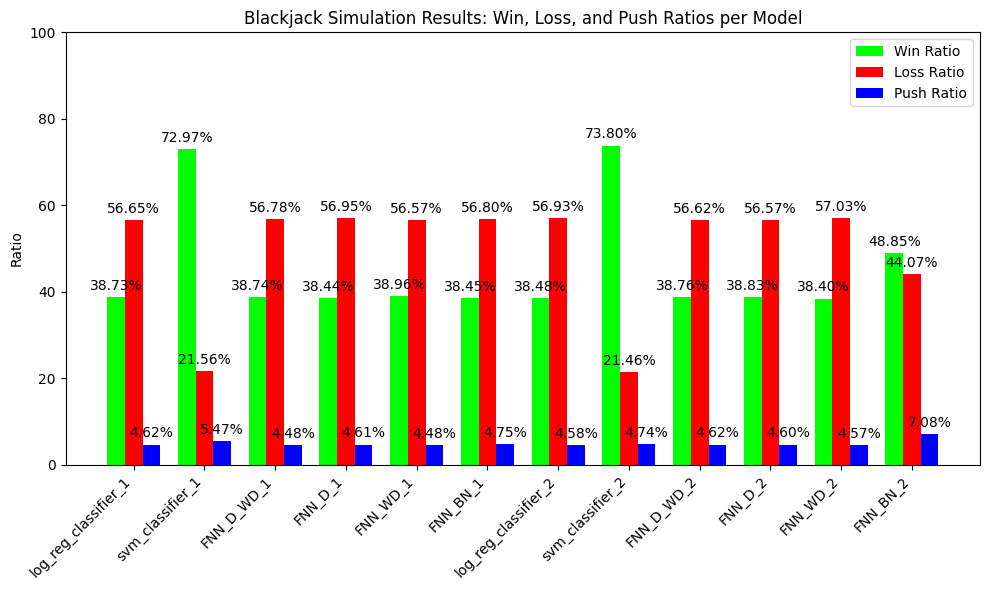

In [158]:
import matplotlib.pyplot as plt
import numpy as np

# Extract data for plotting
model_names = list(model_results.keys())
win_ratios = [results['win'] / (results['win'] + results['loss'] + results['push']) * 100 for results in model_results.values()]
loss_ratios = [results['loss'] / (results['win'] + results['loss'] + results['push']) * 100 for results in model_results.values()]
push_ratios = [results['push'] / (results['win'] + results['loss'] + results['push']) * 100 for results in model_results.values()]

x = np.arange(len(model_names)) # the label locations
width = 0.25 # the width of the bars

fig, ax = plt.subplots(figsize=(10, 6))

rects1 = ax.bar(x - width, win_ratios, width, label='Win Ratio', color='lime')
rects2 = ax.bar(x, loss_ratios, width, label='Loss Ratio', color='red')
rects3 = ax.bar(x + width, push_ratios, width, label='Push Ratio', color='blue')

# Add percentage labels on the bars
ax.bar_label(rects1, fmt='%.2f%%', padding=3)
ax.bar_label(rects2, fmt='%.2f%%', padding=3)
ax.bar_label(rects3, fmt='%.2f%%', padding=3)

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Ratio')
ax.set_title('Blackjack Simulation Results: Win, Loss, and Push Ratios per Model')
ax.set_xticks(x)
ax.set_xticklabels(model_names, rotation=45, ha="right")
ax.legend()
ax.set_ylim(0, 100)

fig.tight_layout()
plt.show()